<a href="https://colab.research.google.com/github/jailer2024/JAILER-CHAPID-SE-ALES-Y-SISTEMAS/blob/main/c%C3%B3digos_parcial_2_se%C3%B1ales_y_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODIGOS PYTHON PARCIAL 2 SEÑALES Y SISTEMAS

wo= 3.141592653589793
Fo= 4.934802200544679


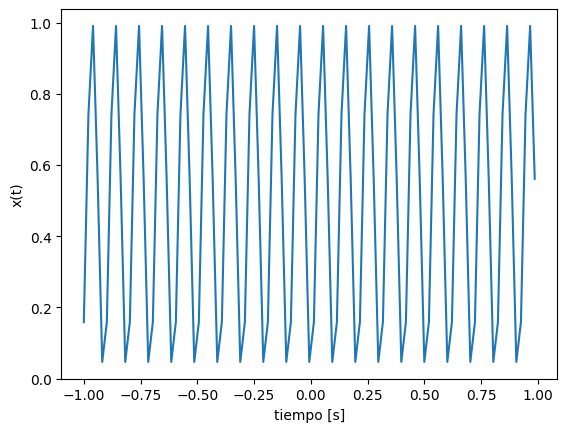

In [55]:
import numpy as np
import matplotlib.pyplot as plt
Fo=0.5
A=1
ti = -1/(2*Fo) #tiempo inicial
tf = 1/(2*Fo) #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(A**2*np.sin(2*np.pi*Fo*tv))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

La señal tiene sometria par x(t)=x(-t)

Punto .2.

Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase como diagrama de
Bode en decibelios), y presente el error relativo y la senal reconstruida para ˜ N = {1, 2, . . . , 50}.


In [56]:
#se crean las bases de la serie exponencial compleja de Fourier

ti = -1/(2*Fo) #tiempo inicial
tf = 1/(2*Fo) #tiempo final
T = tf - ti #intervalo de interés
N = 50 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [57]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=50, min=-50), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

In [58]:
#calcular espectro -> cambiar según la señal estudiada
A=1
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = A**2/2 # nivel dc C_0
cn[N-2] = A**2/4 #armónico -2
cn[N+2] = A**2/4 #armónico +2

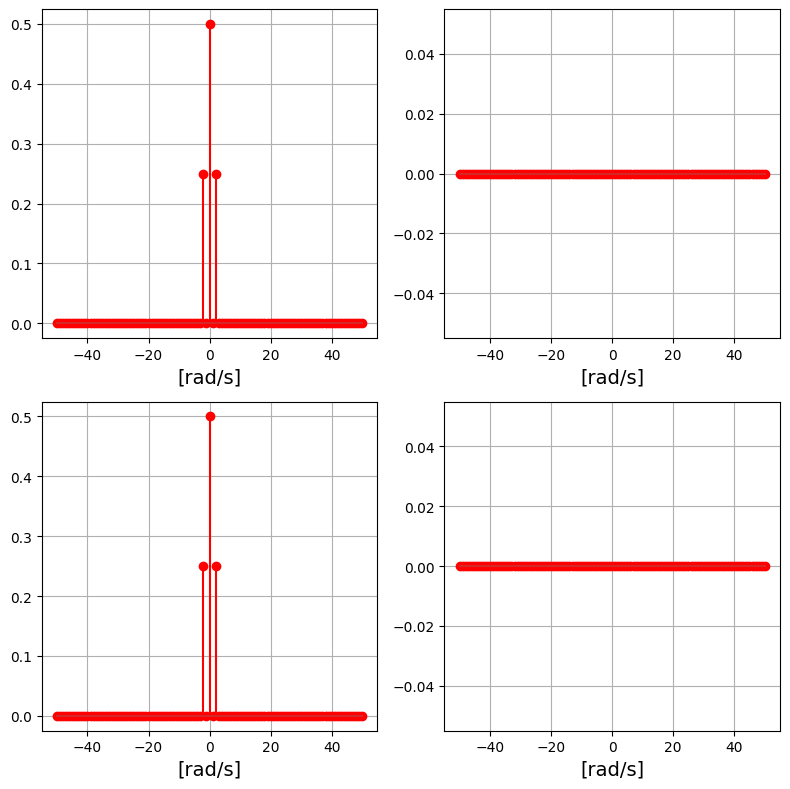

In [59]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Senal reconstruida

In [60]:
#graficar reconstrucción

Px = (3*A)**4/8 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

3. Sea la senal portadora ˜ c(t) = Ac sin(2πFct), con Ac, Fc ∈ R, y la senal mensaje ˜ m(t) ∈ R. Encuentre el espectro en
frecuencia de la senal modulada en amplitud (AM), ˜ y(t) = 
1 + m(t)
Ac

c(t). Luego, descargue desde youtube 5 segundos de
su cancion favorita (capturando del segundo 20 al 25). Presente una simulaci ´ on de modulaci ´ on por amplitud AM (tomando ´
como mensaje el fragmento de la cancion escogida). Grafique las se ´ nales en tiempo y frecuencia (magnitud y fase) de la ˜
senal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y se ˜ nal modulada. ˜ Nota:
se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el ˜ ´ındice de
modulacion deseado.

In [61]:
!pip install yt-dlp

In [62]:
link = "https://www.youtube.com/watch?v=9sg-A-eS6Ig&list=RDQMn6Nrqx1yoog&start_radio=1"
!yt-dlp --extract-audio --audio-format mp3 -o "audio.%(ext)s" {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=9sg-A-eS6Ig
[youtube] 9sg-A-eS6Ig: Downloading webpage
[youtube] 9sg-A-eS6Ig: Downloading ios player API JSON
[youtube] 9sg-A-eS6Ig: Downloading web creator player API JSON
[youtube] 9sg-A-eS6Ig: Downloading m3u8 information
[info] 9sg-A-eS6Ig: Downloading 1 format(s): 251
[download] audio.mp3 has already been downloaded
[ExtractAudio] Not converting audio audio.mp3; file is already in target format mp3


In [54]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [63]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [64]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [76]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 25 #tiempo incio a procesar seg
tf = 30 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [77]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

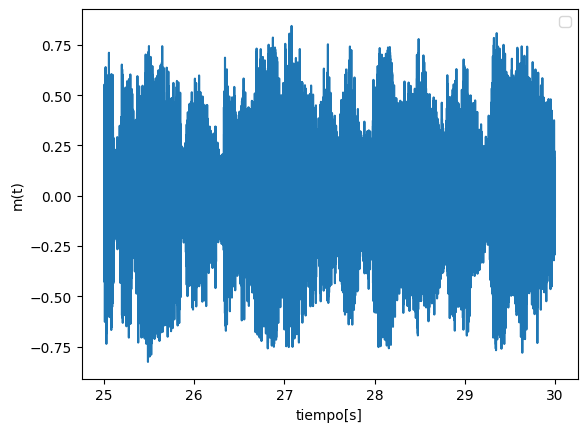

In [78]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()


In [79]:
Fc = 15000 #frecuencia portadora
Im = 0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*tt) #portadora

In [80]:
#repoducir portadora
Audio(c,rate=fs)

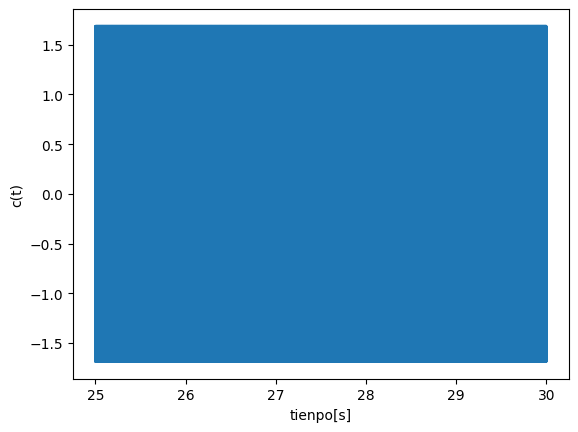

In [81]:

#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('tienpo[s]')
plt.ylabel('c(t)')
plt.show()

In [73]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [74]:
#repoducir modulada
Audio(y,rate=fs)

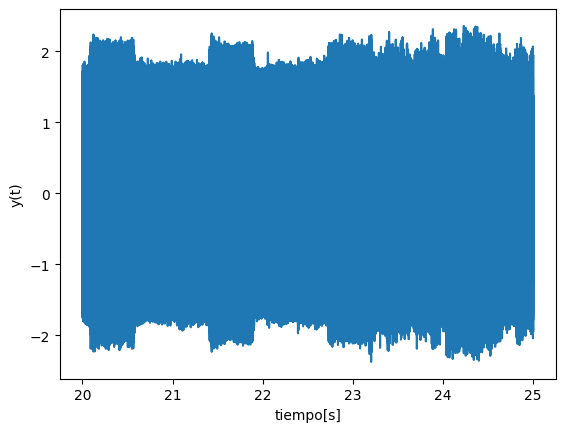

In [75]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('y(t)')
plt.show()


4.Consulte en que consiste la distorsion total de armonicos ( Total Harmonic Distortion-(THD)) y el factor de potencia en un
circuito electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsion del factor de potencia
con base al THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsion del factor de potencia para un
rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias
para las simulaciones. El usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos.

Solucion:


Ejemplo tomado de chat GPT. Para para el calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga netamente resistiva

Valores con R = 10 Ω:
THD: 31.62%
Factor de Potencia Total: 0.9535


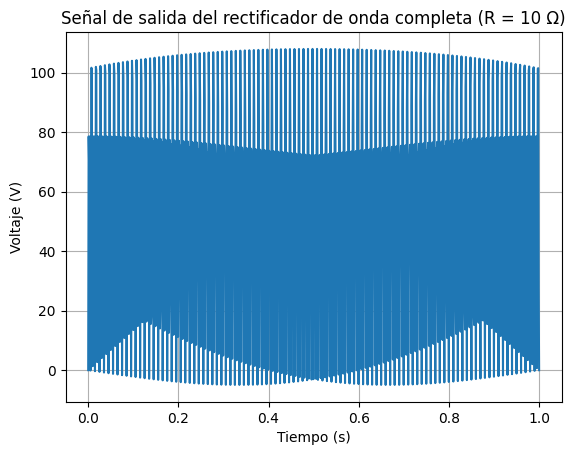

In [82]:

import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal de entrada
V_pico = 100  # Voltaje pico (V)
f_entrada = 50  # Frecuencia de entrada (Hz)

# Parámetro modificable por el usuario (carga resistiva)
R = 10  # Resistencia en Ohmios (puedes cambiar este valor)

# Amplitudes estimadas para la frecuencia fundamental y armónicos
A1 = 0.9 * V_pico  # Amplitud de la frecuencia fundamental (100 Hz)
A3 = 0.3 * A1  # Amplitud del tercer armónico (300 Hz)
A5 = 0.1 * A1  # Amplitud del quinto armónico (500 Hz)

# Cálculo del THD
def calcular_THD(A1, A3, A5):
    THD = np.sqrt(A3**2 + A5**2) / A1
    return THD * 100  # Devuelve el THD como porcentaje

# Cálculo del factor de potencia distorsionado
def calcular_factor_potencia(THD):
    FP_total = 1 / np.sqrt(1 + (THD / 100)**2)
    return FP_total

# Calcular el THD y el factor de potencia
THD = calcular_THD(A1, A3, A5)
FP_total = calcular_factor_potencia(THD)

# Mostrar resultados
print(f"Valores con R = {R} Ω:")
print(f"THD: {THD:.2f}%")
print(f"Factor de Potencia Total: {FP_total:.4f}")

# Opcional: Generar la forma de onda aproximada de salida
def generar_onda_rectificada(t, f_fundamental, V_fundamental, A3, A5):
    # Señal de la frecuencia fundamental (onda completa rectificada)
    signal = V_fundamental * np.abs(np.sin(2 * np.pi * f_fundamental * t))
    # Añadir el tercer y quinto armónico
    signal += A3 * np.sin(2 * np.pi * 3 * f_fundamental * t)
    signal += A5 * np.sin(2 * np.pi * 5 * f_fundamental * t)
    return signal

# Parámetros de simulación de tiempo
t = np.linspace(0, 1, 1000)  # Tiempo en segundos
f_fundamental = 2 * f_entrada  # Duplicar la frecuencia para rectificación completa
V_fundamental = A1  # Amplitud de la frecuencia fundamental

# Generar la señal
señal = generar_onda_rectificada(t, f_fundamental, V_fundamental, A3, A5)

# Graficar la señal de salida
plt.plot(t, señal)
plt.title(f'Señal de salida del rectificador de onda completa (R = {R} Ω)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()


 Genere un ejemplo ilustrativo para el calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos.

Solucion:

Codigo tomado de chat GPT para el calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El usuario podra escoger diferentes valores de R y C.

Valores con R = 10 Ω y C = 0.001 F:
THD: 11.27%
Factor de Potencia Total: 0.9937


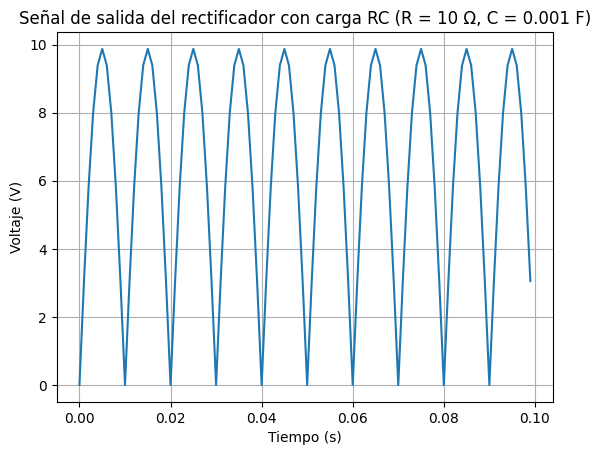

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Parámetros iniciales
V_pico = 100  # Voltaje pico de entrada (V)
f_entrada = 50  # Frecuencia de entrada (Hz)
fs = 1000  # Frecuencia de muestreo (Hz)

# Valores de resistencia y capacitancia (ajustables por el usuario)
R = 10  # Resistencia en Ohmios (puedes cambiar este valor)
C = 0.001  # Capacitancia en Faradios (puedes cambiar este valor)

# Tiempo para la simulación
t = np.linspace(0, 0.1, int(fs * 0.1), endpoint=False)

# Generar la señal de entrada (onda senoidal)
señal_entrada = V_pico * np.sin(2 * np.pi * f_entrada * t)

# Rectificación de onda completa
señal_rectificada = np.abs(señal_entrada)

# Respuesta de la carga RC
omega = 2 * np.pi * 2 * f_entrada  # Frecuencia fundamental después de la rectificación
Z_RC = lambda omega: R + 1j / (omega * C)  # Impedancia de la carga RC
respuesta_RC = np.abs(1 / Z_RC(omega)) * señal_rectificada

# Cálculo de la FFT y THD
def calcular_THD(signal, fs):
    N = len(signal)
    fft_vals = fft(signal)
    fft_magnitude = 2.0 / N * np.abs(fft_vals[:N // 2])
    frequencies = np.fft.fftfreq(N, 1 / fs)[:N // 2]

    # Identificar las amplitudes
    f_fundamental = 2 * f_entrada
    A1 = fft_magnitude[np.argmin(np.abs(frequencies - f_fundamental))]
    A3 = fft_magnitude[np.argmin(np.abs(frequencies - 3 * f_fundamental))]
    A5 = fft_magnitude[np.argmin(np.abs(frequencies - 5 * f_fundamental))]

    THD = np.sqrt(A3**2 + A5**2) / A1
    return THD * 100

# Calcular el THD
THD = calcular_THD(respuesta_RC, fs)

# Cálculo del factor de potencia distorsionado
def calcular_factor_potencia(THD):
    FP_total = 1 / np.sqrt(1 + (THD / 100)**2)
    return FP_total

# Calcular el factor de potencia total
FP_total = calcular_factor_potencia(THD)

# Mostrar resultados
print(f"Valores con R = {R} Ω y C = {C} F:")
print(f"THD: {THD:.2f}%")
print(f"Factor de Potencia Total: {FP_total:.4f}")

# Graficar la señal de salida
plt.plot(t, respuesta_RC)
plt.title(f'Señal de salida del rectificador con carga RC (R = {R} Ω, C = {C} F)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()


Discucion de resultados:

En cuanto al THD, a medida que cambias los valores de R y C, el THD variará. Una resistencia baja o una capacitancia alta tienden a reducir la distorsión armónica, mientras que valores opuestos pueden aumentar el THD.

En cuanto a un Factor de Potencia Total, un THD más alto lleva a un factor de potencia total más bajo, indicando una menor eficiencia en el uso de la energía. Ajustar R y C permite optimizar el rendimiento del circuito y minimizar la distorsión armónica.